# PREDICTING DEFAULT PAYMENTS WITH BANK TRANSACTIONS

#### FIRST OF ALL, WE WILL DRAW SOME GRAPHICS TO KNOW WHICH FEATURES WE WLL STUDY

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/home

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the CSV with all data**

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

**Drop the irregular cells**

In [39]:
#MARRIAGE
df = df.drop(df[df['MARRIAGE'] < 1].index)

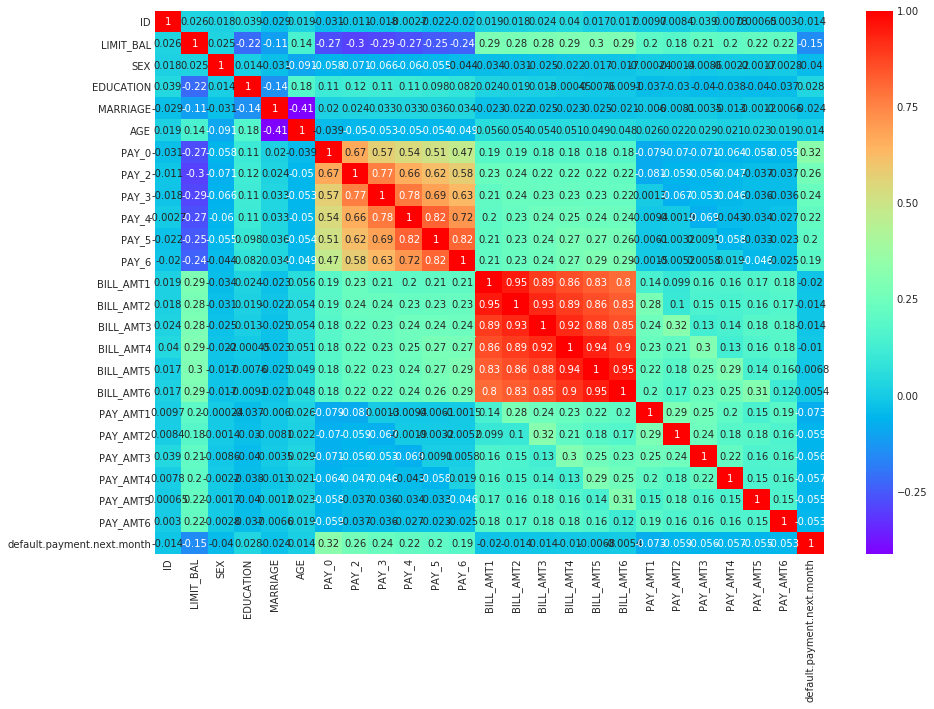

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(fd.corr(),cmap='rainbow', annot=True)


**We apply a transformation on SEX column cause we want it binary (0,1). (comoditat xd)**

In [7]:
sex = pd.get_dummies(df['SEX'], drop_first=True)
df.drop('SEX',axis=1,inplace=True)
df = pd.concat([df,sex],axis=1)
df = df.rename(index=str, columns={2: 'SEX'})

**LET'S SEE SOME COUNTPLOTS TO SEE HOW DATA EVOLVES**

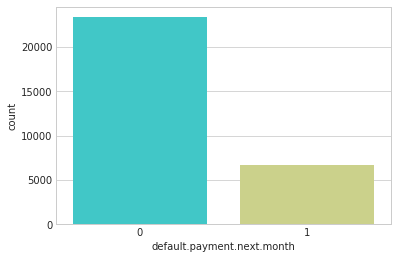

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='default.payment.next.month',data=df,palette='rainbow')
#0 = male ; 1 = famale

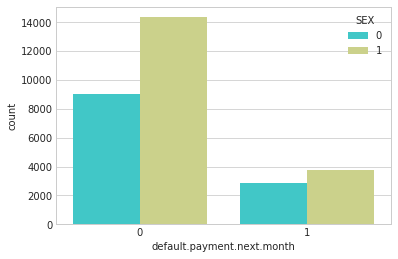

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='default.payment.next.month',hue='SEX',data=df,palette='rainbow')

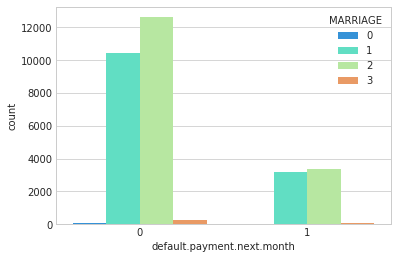

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='default.payment.next.month',hue='MARRIAGE',data=df,palette='rainbow')

**Boxplot per veure si tenim outlayers** (crec que es deien així)

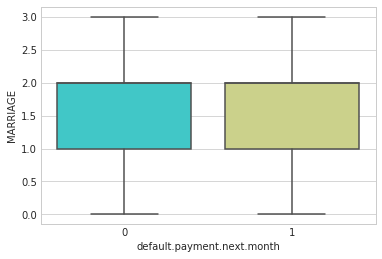

In [20]:
sns.boxplot(x='default.payment.next.month', y = '',data=df, palette='rainbow')

#### FIRST METHOD

#### LOGIC REGRESSION

Non-logic values or Nans?

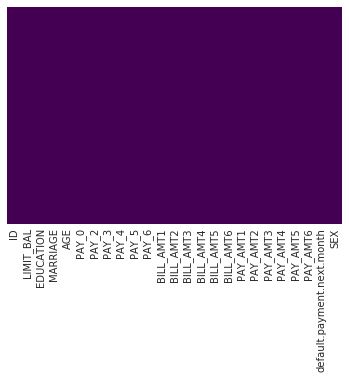

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
X_logic = df.copy().drop('default.payment.next.month', axis = 1)
Y_logic = df['default.payment.next.month'].copy()

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_logic, Y_logic, test_size=0.30)

In [55]:
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

#### RANDOM FOREST

In [44]:
X_random = df.copy().drop('default.payment.next.month', axis = 1)
Y_random = df['default.payment.next.month'].copy()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random, Y_random, test_size=0.30)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
rfc_pred = rfc.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(Y_test,rfc_pred))
print(classification_report(Y_test,rfc_pred))

[[6630  409]
 [1209  752]]
             precision    recall  f1-score   support

          0       0.85      0.94      0.89      7039
          1       0.65      0.38      0.48      1961

avg / total       0.80      0.82      0.80      9000

